In [20]:
from convokit import Corpus, download, FightingWords
import pandas as pd

In [5]:
# for now being simple and just using whole years for a given natural court
# could potentially get all case ids for the exact date range of natural courts and subset the corpora from there
rehnquist_7_full_years = [i for i in range(1995,2005)]
roberts_4_full_years = [i for i in range(2011,2016)]
cases_df = pd.read_json('../data/cases.json', lines=True)
roberts_cases = cases_df.loc[cases_df.loc[:, 'year'].isin(roberts_4_full_years)]
renquist_cases = cases_df.loc[cases_df.loc[:, 'year'].isin(rehnquist_7_full_years)]

In [6]:
# make merged dataset for rehnquist
rehnquist_corpus = None
for year in rehnquist_7_full_years:
    corp = Corpus(filename=download(f"supreme-{year}"))
    print(corp.print_summary_stats())
    if not rehnquist_corpus:
        rehnquist_corpus = corp
    else:
        rehnquist_corpus = Corpus.merge(rehnquist_corpus, corp)
print(rehnquist_corpus.print_summary_stats())

Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1995
Number of Speakers: 154
Number of Utterances: 21359
Number of Conversations: 76
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1996
Number of Speakers: 169
Number of Utterances: 21614
Number of Conversations: 81
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1997
Number of Speakers: 184
Number of Utterances: 24253
Number of Conversations: 93
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1998
Number of Speakers: 173
Number of Utterances: 21223
Number of Conversations: 79
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-1999
Number of Speakers: 157
Number of Utterances: 20172
Number of Conversations: 75
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2000
Number of Speakers: 154
Number of Utterances: 18347
Number of Conversations: 78
None
Dataset already exists at /U

In [7]:
# maked merged dataset for roberts corpus
roberts_corpus = None
for year in roberts_4_full_years:
    corp = Corpus(filename=download(f"supreme-{year}"))
    print(corp.print_summary_stats())
    if not roberts_corpus:
        roberts_corpus = corp
    else:
        roberts_corpus = Corpus.merge(roberts_corpus, corp)
print(roberts_corpus.print_summary_stats())

Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2011
Number of Speakers: 127
Number of Utterances: 16388
Number of Conversations: 73
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2012
Number of Speakers: 127
Number of Utterances: 16606
Number of Conversations: 74
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2013
Number of Speakers: 118
Number of Utterances: 14556
Number of Conversations: 67
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2014
Number of Speakers: 97
Number of Utterances: 12182
Number of Conversations: 55
None
Dataset already exists at /Users/meganmoore/.convokit/downloads/supreme-2015
Number of Speakers: 127
Number of Utterances: 15986
Number of Conversations: 69
None
Number of Speakers: 395
Number of Utterances: 75718
Number of Conversations: 338
None


In [8]:
# split roberts courts into wins and losses
roberts_convo_df= roberts_corpus.get_conversations_dataframe()
roberts_wins_df = roberts_convo_df.loc[roberts_convo_df.loc[:, 'meta.win_side'] == 1, :]
roberts_losses_df = roberts_convo_df.loc[roberts_convo_df.loc[:, 'meta.win_side'] == 0, :]
roberts_convo_df.head()

,vectors,meta.case_id,meta.advocates,meta.win_side,meta.votes_side
id,,,,,
22060,[],2011_11-182,"{'paul_d_clement': {'side': 1, 'role': 'for th...",0,"{'j__john_g_roberts_jr': 0, 'j__antonin_scalia..."
22022,[],2011_11-161,"{'mark_t_stancil': {'side': 1, 'role': 'on beh...",0,"{'j__john_g_roberts_jr': 1, 'j__antonin_scalia..."
23188,[],2011_11-159,"{'eric_d_miller': {'side': 1, 'role': 'Assista...",1,"{'j__john_g_roberts_jr': 1, 'j__antonin_scalia..."
22543,[],2011_10-1320,"{'clifford_m_sloan': {'side': 1, 'role': 'for ...",0,"{'j__john_g_roberts_jr': 0, 'j__antonin_scalia..."
22258,[],2011_10-844,"{'james_f_hurst': {'side': 1, 'role': 'for the...",1,"{'j__john_g_roberts_jr': 1, 'j__antonin_scalia..."


In [9]:
# Roberts Data Analysis

In [17]:
# check that there are no incorrect case ids in the corpus and see how 
# many cases we don't have a record of in the corpus
corpus_case_ids = roberts_convo_df.loc[:, 'meta.case_id'].unique()
cases_ids = list(cases_df.loc[cases_df.loc[:, 'year'].isin(roberts_4_full_years), 'id'].unique())
num_diff = len(cases_ids)-len(corpus_case_ids) # num missing conversations 
discrepancies = [i for i in cases_ids if i not in corpus_case_ids]
corp_not_case = [i for i in corpus_case_ids if i not in cases_ids]
print(discrepancies, num_diff, corp_not_case)
# all case ids in the corpus are valid case ids in the case_ids
# there are 67 missing cases that are not 

['2011_11-1179', '2011_10-1540', '2011_10-1115', '2011_11-1053', '2011_11-74', '2011_10-1521', '2011_10-1032', '2011_11-391', '2011_11-845', '2011_11-208', '2011_11-1184', '2011_11-38', '2012_12-168', '2012_12-382', '2012_12-694', '2012_11-1377', '2012_12-1084', '2012_12-1208', '2012_12-623', '2013_13-299', '2013_12-1094', '2013_13-113', '2013_13-6440', '2013_13-5967', '2013_11-1507', '2013_13-640', '2013_12-992', '2013_12-1217', '2013_13-551', '2013_13-301', '2013_13-9085', '2014_13-1421', '2014_13-1433', '2014_14-116', '2014_14-212', '2014_13-10400', '2014_14-6873', '2014_13-1412', '2014_13-896', '2014_14-95', '2014_14-593', '2014_14-400', '2014_14-275', '2014_13-7211', '2014_13-1318', '2014_126-orig', '2014_13-720', '2014_13-946', '2014_14-378', '2014_14-46', '2014_13-534', '2014_14-939', '2014_14-6381', '2014_14-618', '2015_15-278', '2015_14-10078', '2015_15-493', '2015_15-789', '2015_15-833', '2015_15-8366', '2015_14-848', '2015_14-1458', '2015_14-1143', '2015_15-648', '2015_14-10

In [18]:
# cases that are duplicated in the roberts corpus, there are only 8 cases that have 
# multiple conversation entries in the corpus, if we do anything that weights wins/losses by conversation
# then we need to take this into consideration because there will be double counting of win/loss for these case ids
unique_ids = []
dup_ids = {}
for case_id in roberts_convo_df.loc[:, 'meta.case_id']:
    if case_id in unique_ids:
        if case_id in dup_ids.keys():
            dup_ids[case_id] += 1
        else:
            dup_ids[case_id] = 1
    else:
        unique_ids.append(case_id)
dup_ids

{'2011_10-1491': 1,
 '2011_10-9646': 1,
 '2011_11-393': 3,
 '2012_10-930': 1,
 '2013_13-132': 1,
 '2014_13-7120': 1,
 '2014_14-556': 1,
 '2015_14-449': 1}

In [ ]:
# Rehnquist Data Analysis

In [13]:
rehnquist_convo_df= rehnquist_corpus.get_conversations_dataframe()
rehnquist_wins_df = rehnquist_convo_df.loc[rehnquist_convo_df.loc[:, 'meta.win_side'] == 1, :]
rehnquist_losses_df = rehnquist_convo_df.loc[rehnquist_convo_df.loc[:, 'meta.win_side'] == 0, :]

In [14]:
# check that there are no incorrect case ids in the corpus and see how 
# many cases we don't have a record of in the corpus
corpus_case_ids = rehnquist_convo_df.loc[:, 'meta.case_id'].unique()
cases_ids = list(cases_df.loc[cases_df.loc[:, 'year'].isin(rehnquist_7_full_years), 'id'].unique())
num_diff = len(cases_ids)-len(corpus_case_ids) # num missing conversations 
discrepancies = [i for i in cases_ids if i not in corpus_case_ids]
corp_not_case = [i for i in corpus_case_ids if i not in cases_ids]
print(discrepancies, num_diff, corp_not_case)
# all case ids in the corpus are valid case ids in the case_ids
# there are 90 missing cases that are not 

['1995_95-6710', '1995_95-1612', '1995_95-1025', '1995_95-7186', '1995_94-9323', '1995_95-1242', '1995_95-7587', '1995_95-1691', '1995_94-8988', '1995_95-6016', '1995_35-orig', '1995_94-1419', '1996_95-1425', '1996_96-713', '1996_95-2025', '1996_96-987', '1996_96-5369', '1996_96-5831', '1996_96-8005', '1996_96-858', '1996_96-1033', '1996_96-1104', '1996_96-1383', '1996_95-2082', '1996_95-1906', '1996_96-8796', '1997_97-6749', '1997_97-8214', '1997_97-5370', '1997_97-122', '1997_97-7300', '1997_97-954', '1997_97-1217', '1997_97-663', '1998_98-437', '1998_98-1071', '1998_98-8486', '1998_127-orig', '1998_98-8952', '1998_98-6945', '1998_98-7591', '1998_98-1062', '1998_120-orig', '1998_98-7450', '1998_98-7771', '1998_98-1412', '1998_98-9085', '1998_98-83', '1999_99-295', '1999_98-9933', '1999_98-9913', '1999_99-5283', '1999_98-8770', '1999_99-5440', '1999_99-5260', '1999_99-5316', '1999_98-1111', '2000_00-262', '2000_00-866', '2000_00-121', '2000_00-1210', '2000_00-1028', '2000_00-132', '20

In [19]:
# cases that are duplicated in the rehnquist corpus, there are only 3 cases that have 
# multiple conversation entries in the corpus, if we do anything that weights wins/losses by conversation
# then we need to take this into consideration because there will be double counting of win/loss for these case ids
unique_ids = []
dup_ids = {}
for case_id in rehnquist_convo_df.loc[:, 'meta.case_id']:
    if case_id in unique_ids:
        if case_id in dup_ids.keys():
            dup_ids[case_id] += 1
        else:
            dup_ids[case_id] = 1
    else:
        unique_ids.append(case_id)
dup_ids.keys()
dup_ids

{'1999_98-6322': 1, '2000_99-1257': 1, '2003_02-1674': 1}

In [21]:
win_loss_fw = FightingWords(obj_type='conversation')
win_loss_fw.fit(roberts_corpus, class1_func = lambda convo: convo.meta['win_side'] == 1,
       class2_func = lambda convo: convo.meta['win_side'] == 0)

Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 207 valid corpus components. class2_func returned 131 valid corpus components.
Vocab size is 15000
Comparing language...
ngram zscores computed.


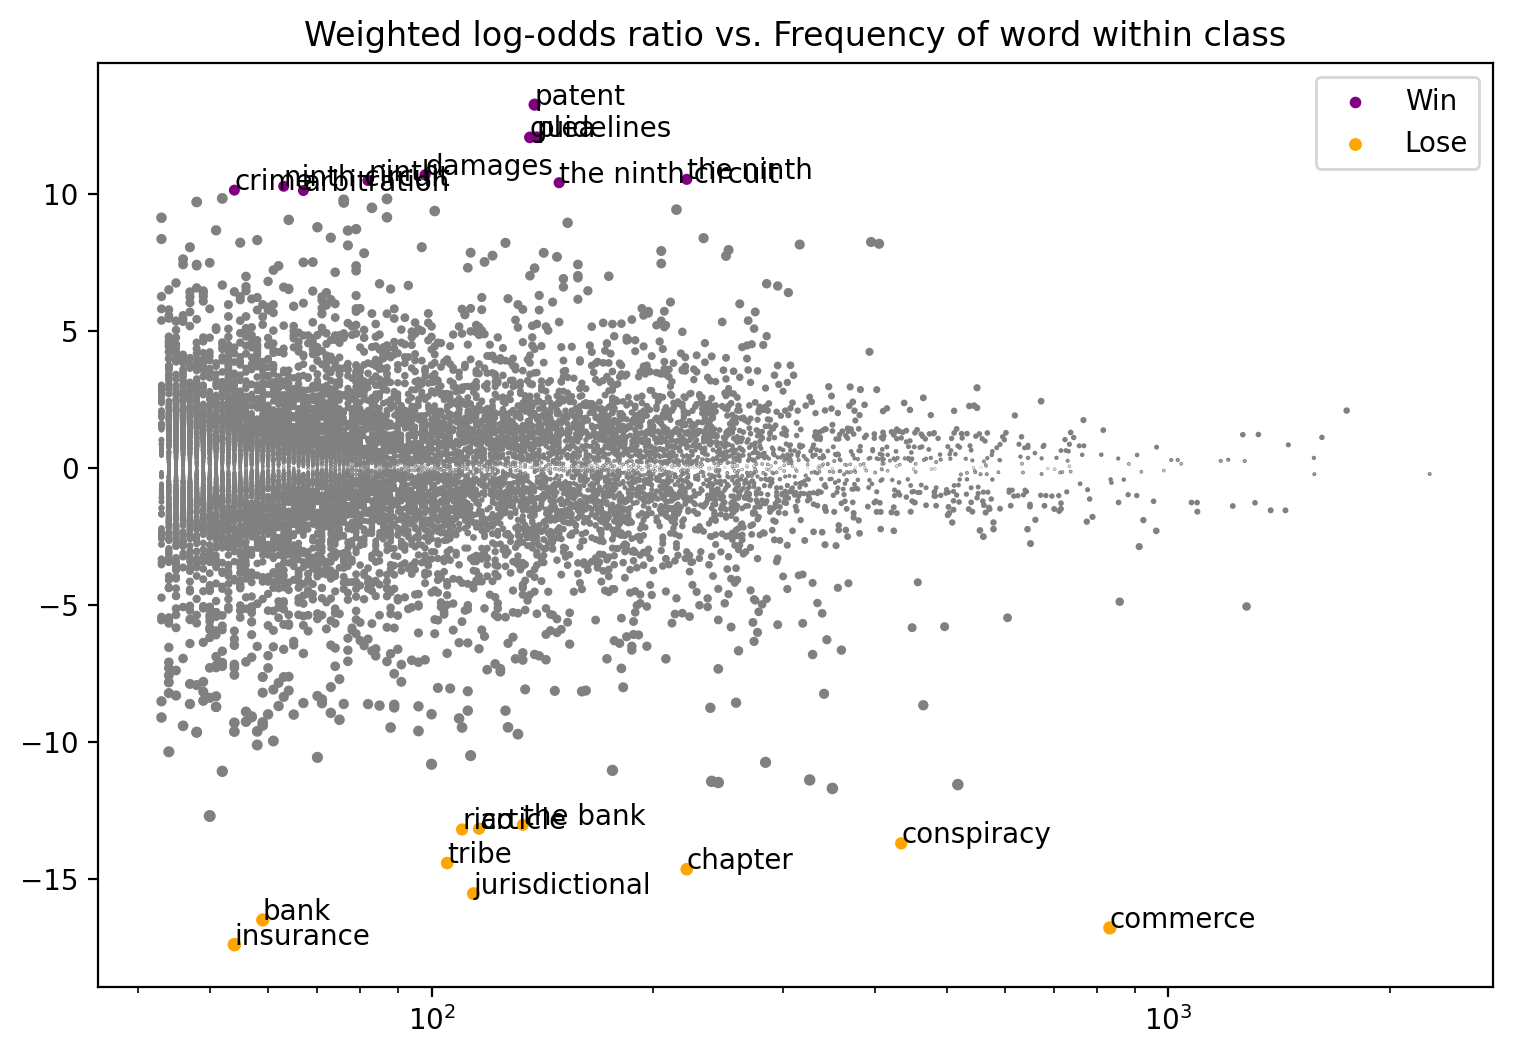

,z-score,class
ngram,,
insurance,-17.389999,Lose
commerce,-16.778952,Lose
bank,-16.491287,Lose
jurisdictional,-15.529597,Lose
chapter,-14.640042,Lose
...,...,...
the ninth,10.518452,Win
damages,10.681394,Win
guidelines,12.048674,Win


In [22]:
win_loss_fw.summarize(roberts_corpus, plot=True, class1_name='Win', class2_name='Lose')

In [25]:
# top 20 words for wins and top 20 words for losses
win_loss_fw.get_top_k_ngrams(20)

(['patent',
  'plea',
  'guidelines',
  'damages',
  'the ninth',
  'ninth',
  'the ninth circuit',
  'ninth circuit',
  'crime',
  'arbitration',
  'possession',
  'convicted',
  'attorney general',
  'fda',
  'prison',
  'infringement',
  'attorney',
  'death',
  'kansas',
  'the attorney general'],
 ['insurance',
  'commerce',
  'bank',
  'jurisdictional',
  'chapter',
  'tribe',
  'conspiracy',
  'rico',
  'article',
  'the bank',
  'standing',
  'the senate',
  'federal government',
  'fee',
  'verdict',
  'the federal government',
  'protection',
  'sale',
  'tax',
  'grand'])